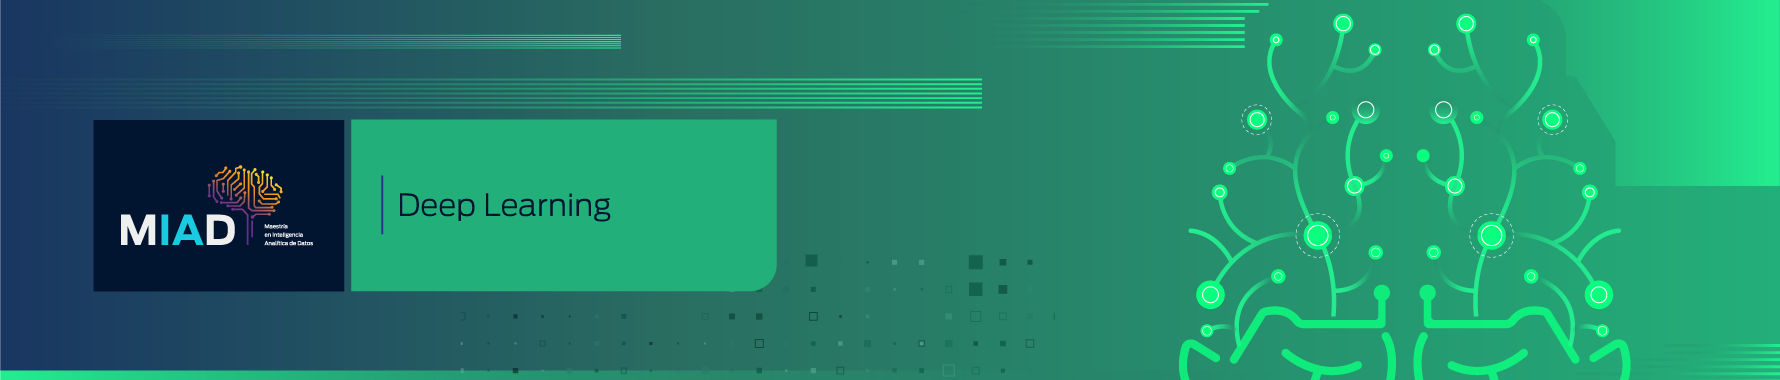

# Semana 5: Introducción a Redes Convolucionales

## La operación convolución y detección de bordes.

### Propósito 

La detección de bordes es una técnica de procesamiento de imagenes que tiene como objetivo identificar las fronteras de los objetos o regiones en una imagen. La detección de estas características geométricas es importante ya que describe la forma de los objetos de una manera más compacta que permite reconocerlos con mayor facilidad con una red neuronal menos densa y compleja. Esta técnica se basa en la operación de convolución y es el fundamento clave de las redes neuronales convolucionales. En este notebook revisaremos el funcionamiento de esta operación y se presentarán y explicarán algunas técnicas de procesamiento de imágenes y detección de bordes usando el paquete OpenCV _(cv2)_.

### Instrucciones generales
1. Cuando se le solicite declarar una estructura de datos debe usar el nombre exigido.
2. Utilice estrictamente los tipos de datos y nombres de variable indicadas en los enunciados de los ejercicios.
3. Evite crear, eliminar o modificar celdas de este notebook (salvo lo que se le indique) pues puede afectar el proceso de calificación automático.  


### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos básicos de este notebook:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Convolución

Esta operación, esencial para las redes neuronales convolucionales, permite extraer las características más importantes de una imagen, por ejemplo, los bordes de los objetos. Gracias a esto, se simplifica la información de la imagen original para reducir sus dimensiones y usar una red eficiente con una cantidad de neuronas menor a las que se requerirían si se trabajar con la imagen en su resolución original. 

Para identificar características específicas de la imagen, como los bordes de regiones/objetos, se utilizan filtros. Para entender la aplicación de un filtro, supongamos que tenemos una imagen simple de $6\times 6$ pixeles con la mitad izquierda de color blanco (valor de pixel 255) y la mitad derecha de color negro (valor de pixel 0) y queremos realizar una convolución con un filtro/kernel de dimensión $3\times 3$:

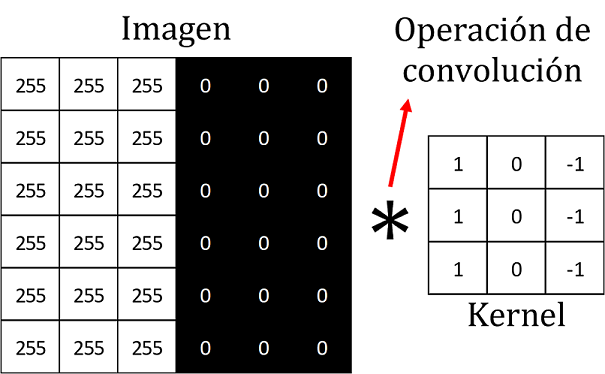

El procedimiento de convolución se puede ilustrar en el siguiente diagrama, donde observamos que el filtro se multiplica con la primera sección $3\times 3$ de la imagen y se suman los resultados en la primera celda, luego se desplaza a la siguiente columna y se multiplica con la segunda sección, así hasta terminar en la fila, desde el cual pasa a la primera columna de la siguiente fila y continúa:
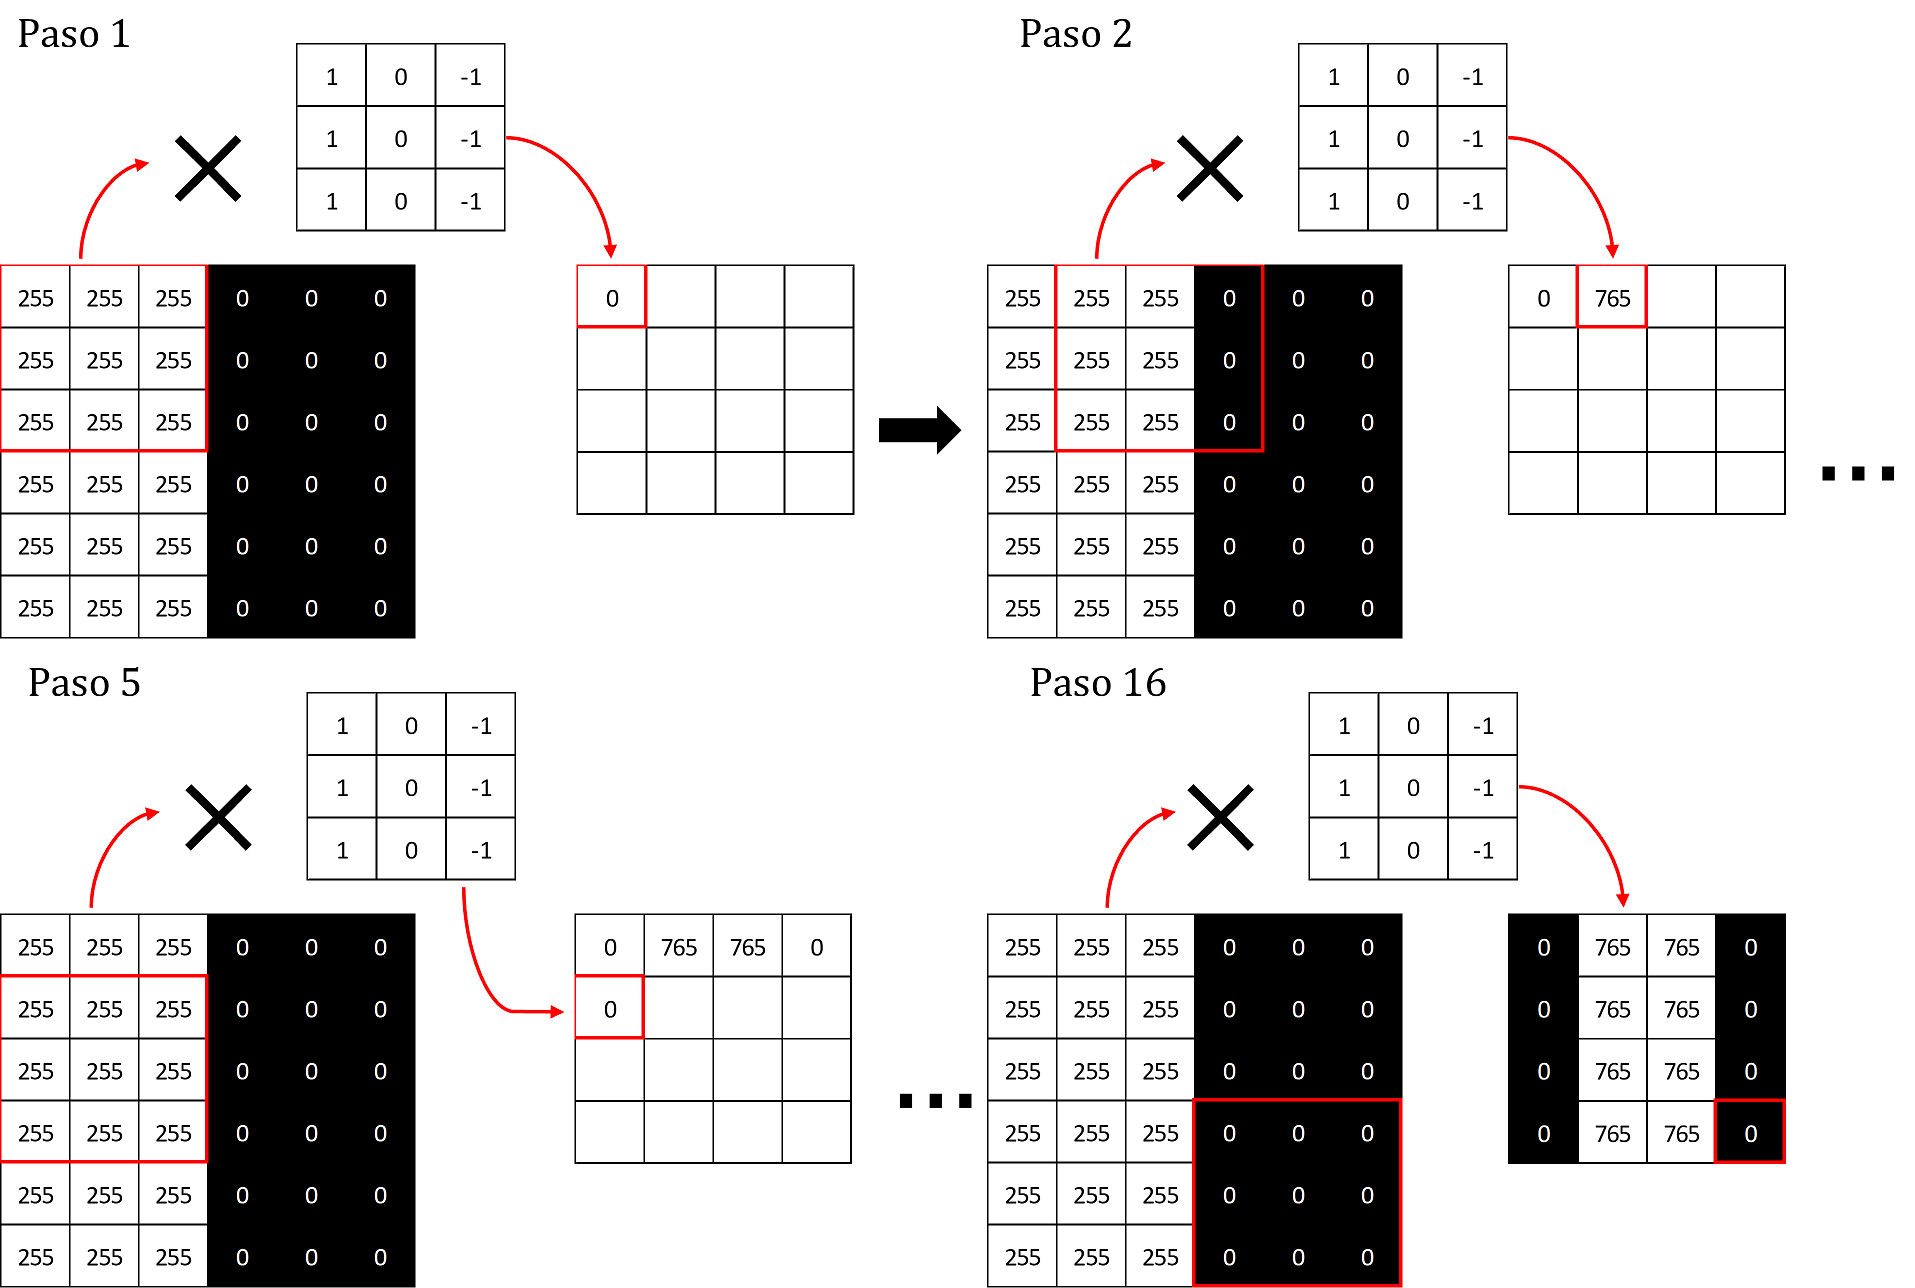

Se puede observar que la matriz resultante es de menor tamaño y detecta la presencia de una línea vertical en el centro de la imagen. Lo anterior se puede evidenciar en las dos columnas centrales cuyos valores de pixel se intensifican (pasa de 255 a 765), lo cual se verá como una línea blanca vertical acentuada.

Esta técnica es la base de varios algoritmos de detección de bordes, las cuales implementan varios pasos adicionales para identificar los contornos más relevantes de los objetos a analizar.

### Pasos para implementar la detección de bordes

1. Convertir una imagen a escala de grises.
2. Detección de bordes - Sobel.
3. Detección de bordes -  Canny.

### 1.  Convertir una imagen a escala de grises.

Para iniciar el proceso de detección de bordes, debemos importar la librería de OpenCV, _cv2,_ para cargar la imagen a trabajar en nuestro notebook. Con Matplotlib podemos visualizar la imagen cargada y cualquier modificación que vayamos realizando en el procesamiento, pero antes debemos tener en cuenta que ambos paquetes manejan los canales de colores en diferentes órdenes: mientras OpenCV maneja primero el color azul (B), luego el verde (G) y finalmente el rojo (R), Matplotlib los trabaja en el órden RGB. Este cambio de órden se logra con la función `cvtColor` y el comando de OpenCV `cv2.COLOR_BGR2RGB`.

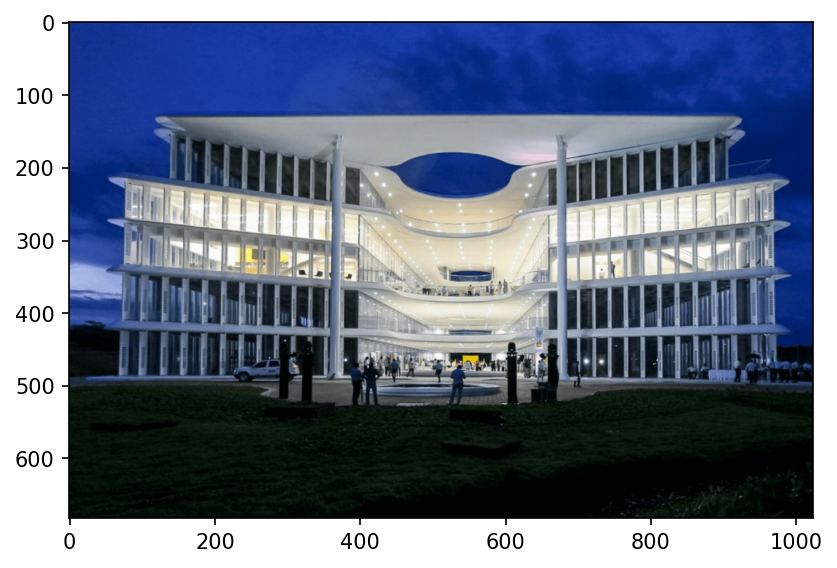

In [2]:
import cv2
img=cv2.imread("sede-caribe-uniandes.png")
plt.figure(dpi=150)
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

La detección de bordes implica identificar cambios repentinos en la intensidad de los pixeles. Para hacerlo eficientemente, se procesa la imagen usando dos ténicas básicas. En primer lugar, se transforma la imagen a su escala de grises aprovechando que solo se necesita la intensidad del pixel y no el color que representa, lo cual se puede lograr a través de la función con la función `cvtColor` y el comando de OpenCV `cv2.COLOR_RGB2GRAY`:

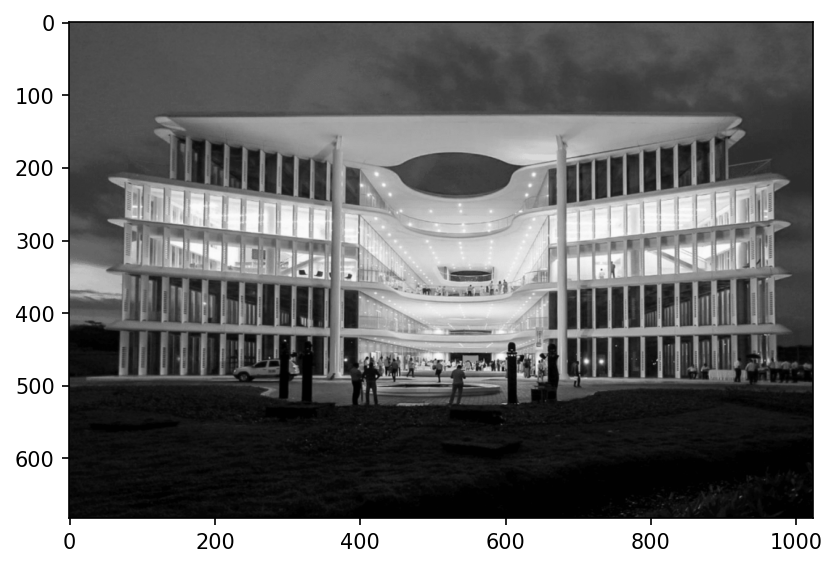

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(dpi=150)
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

Una vez se transforma la imagen a escala de grises, se aplica un segundo procesamiento que consiste en difuminarla con el propósito de reducir el ruido de la imagen. La razón por la que se aplica esta técnica es porque la detección de bordes utiliza la derivada numérica de la intensidad de los pixeles, la cual no es suficiente para diferenciar, por sí sola, entre el borde de un objeto y uno causado por el ruido de la imagen. Es decir, la intensidad de los pixeles vecinos en una imagen pueden fluctuar, resaltando unos bordes que no representan la estructura de la región dominante que se busca identificar.

La función de difuminado _(GaussianBlur)_ suaviza la variación de intensidad cerca de los bordes, haciendo más fácil su identificación. El grado de difuminado se da por el tamaño de la matriz del kernel de convolución, para el cual se pueden especificar sus valores siempre y cuando sean positivos e impares. Para este ejemplo utilizaremos una matriz 3x3:

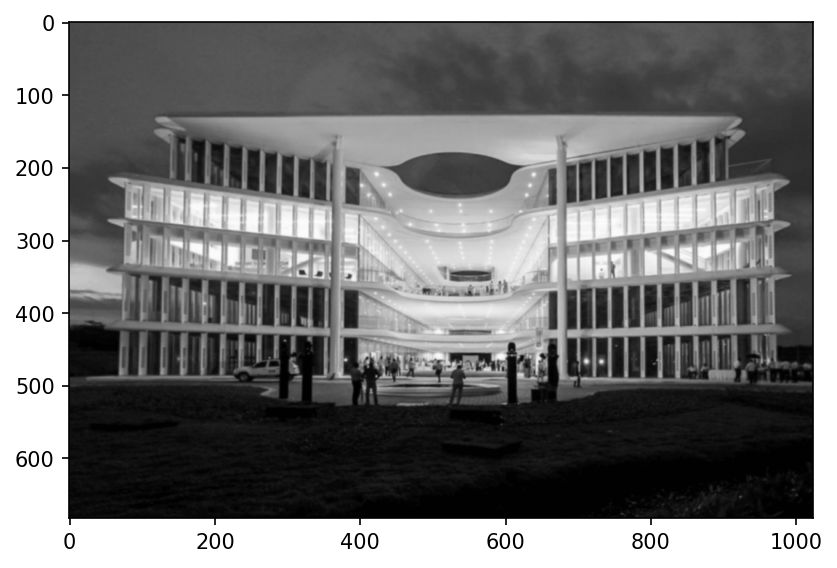

In [4]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
plt.figure(dpi=150)
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 2. Detección de bordes - Sobel

La técnica Sobel es uno de los algoritmos más utilizados en detección de bordes la cual identifica los cambios repentinos en la intensidad de los pixeles $I(x,y)$. La subida de la intensidad es más evidente si se considera la primera derivada de la función de intensidad $I'(x,y)$. Esta idea se presenta en una dirección con las siguientes gráficas: 

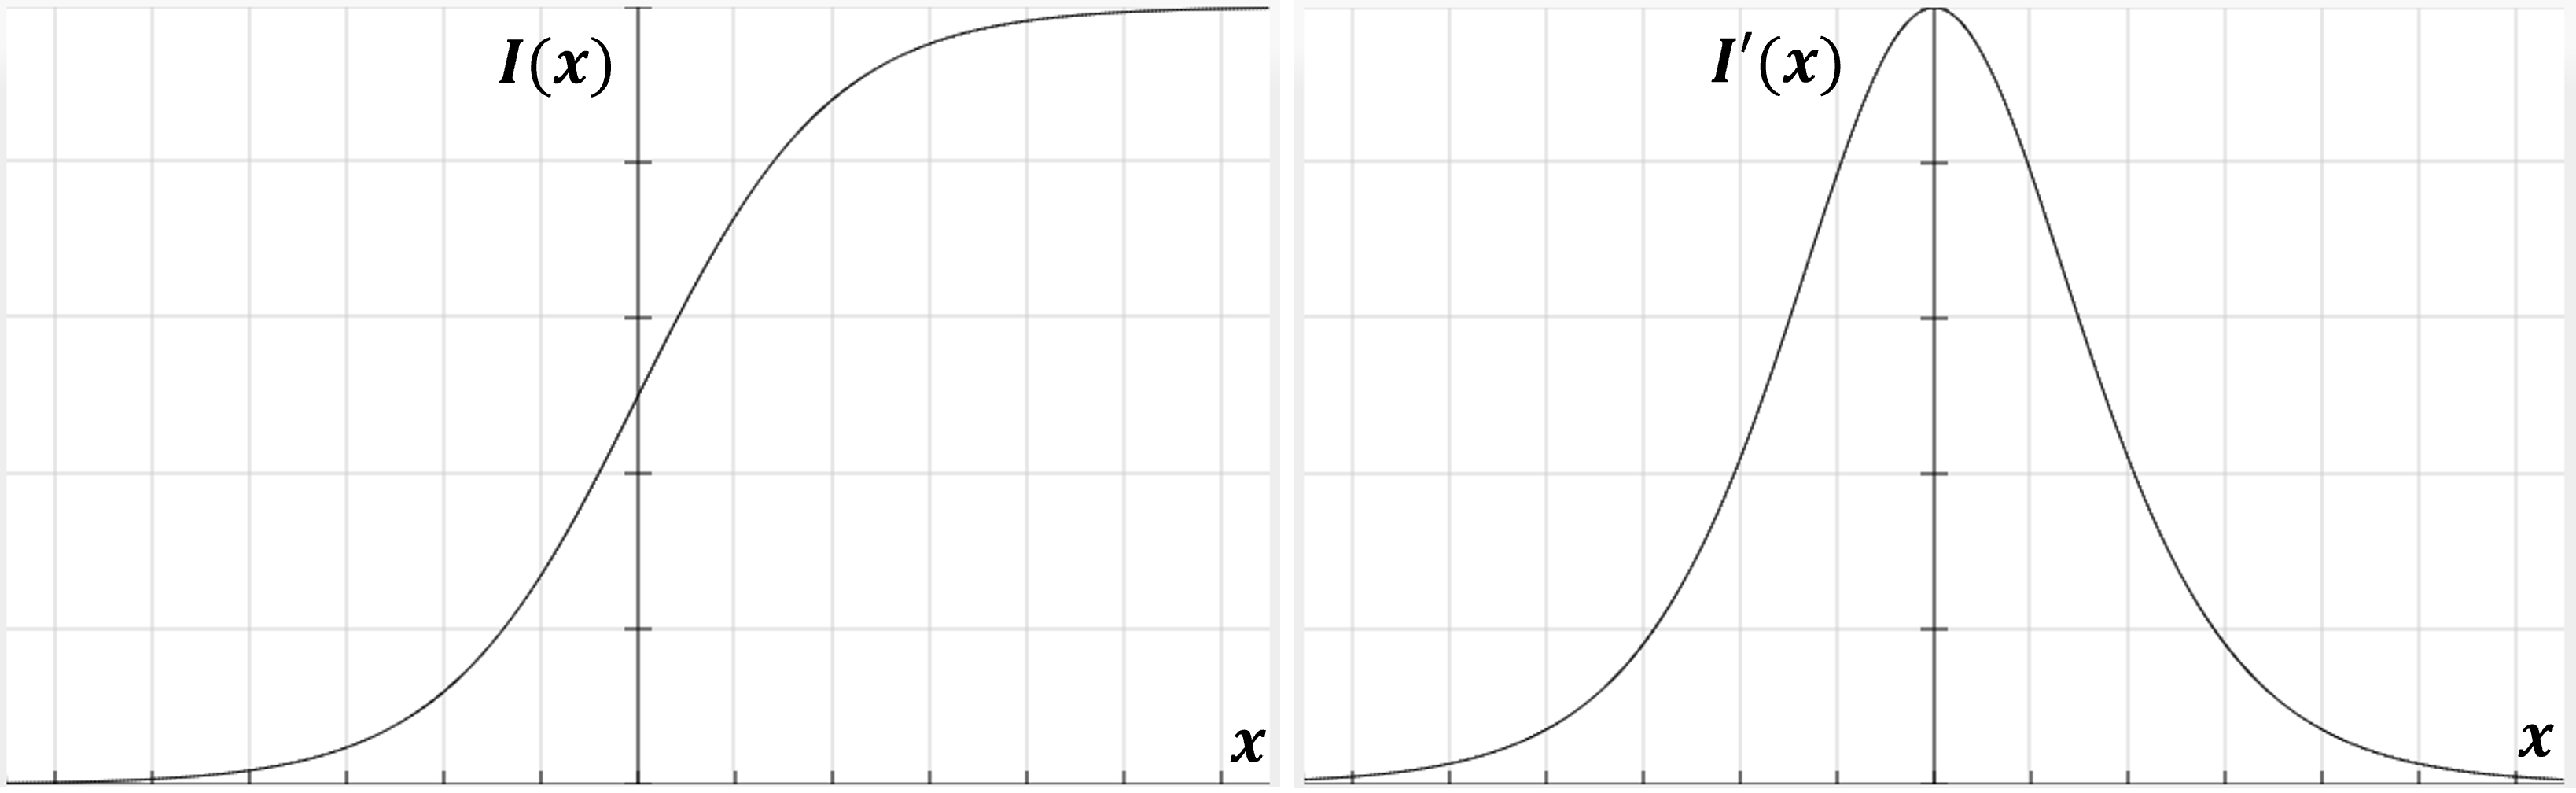

De esta manera, los bordes se pueden detectar en sitios donde el gradiente sea mayor a un valor particular de corte. Además, la derivada resulta de utilidad para revelar los cambios repentinos de intensidad. Dicha derivada se puede calcular aproximadamente utilizando un kernel de 3x3. Utilizamos un kernel para detectar cambios en la intensidad de pixeles en $x$ ($A$) y otro en $y$ ($B$):
$$
\begin{equation}
A =  \begin{bmatrix}
-1&0&+1\\
-2&0&+2\\
-1&0&+1
\end{bmatrix}
\quad;\quad
B =  \begin{bmatrix}
+1&+2&+1\\
0&0&0\\
-1&-2&-1
\end{bmatrix}
\end{equation}
$$

Al hacer la convolución de estos kernel con la imagen de entrada se obtiene una visualización de los bordes tipo Sobel. Si se usa únicamente el kernel vertical $A$, se obtendrá un gradiente $G_x$ de la imagen $I$ que resaltará los bordes de la dirección $x$. Lo opuesto sucede con el kernel horizontal $B$, del cual se obtiene el gradiente $G_y$ y resalta los bordes de la dirección $y$: 

\begin{equation*} G_x = A * I \quad;\quad G_y = B * I \end{equation*}
donde $*$ se refiere a la operación convolución e $I$ representa la imagen de entrada. 

Ahora, se puede calcular aproximadamente la magnitud del gradiente $G$ y la orientación de este $\Theta$ como:
\begin{equation*} G = \sqrt{G_x^2 + G_y^2} \end{equation*}
\begin{equation*} \Theta = arctan(G_y / G_x) \end{equation*}

En el siguiente código se utiliza la función _Sobel()_ para calcular los bordes de Sobel para cada dirección $x$ e $y$ y el gradiente compuesto para ambas direcciones $xy$. Para esto es importante tener en cuenta la sintaxis de la función de OpenCV:

`Sobel(src, ddepth, dx, dy, ksize)`

El parámetro _ddepth_ especifica la precisión de la imagen que entrega la función, mientras _dx_ y _dy_ especifican el orden de la derivada en la dirección correspondiente. Por ejemplo, para obtener la primera derivada en la dirección $y$, se establece _dx=0_ y _dy=1_, mientras que para el gradiente compuesto en ambas direcciones se especifica _dx=1_ y _dy=1_. Finalmente, la dimensión de la matriz de kernel se define en _ksize_.

En las siguientes líneas de código se generan imágenes con la detección de bordes de Sobel usando un kernel de tamaño $5\times 5$ para cada dirección y combinada. Es importante tener en cuenta que, para poder mostrar la imagen resultante en Matplotlib, se deben reescalar los resultados de la función Sobel a números enteros entre 0 y 255, lo cual se logra con la función `convertScaleAbs` de OpenCV:

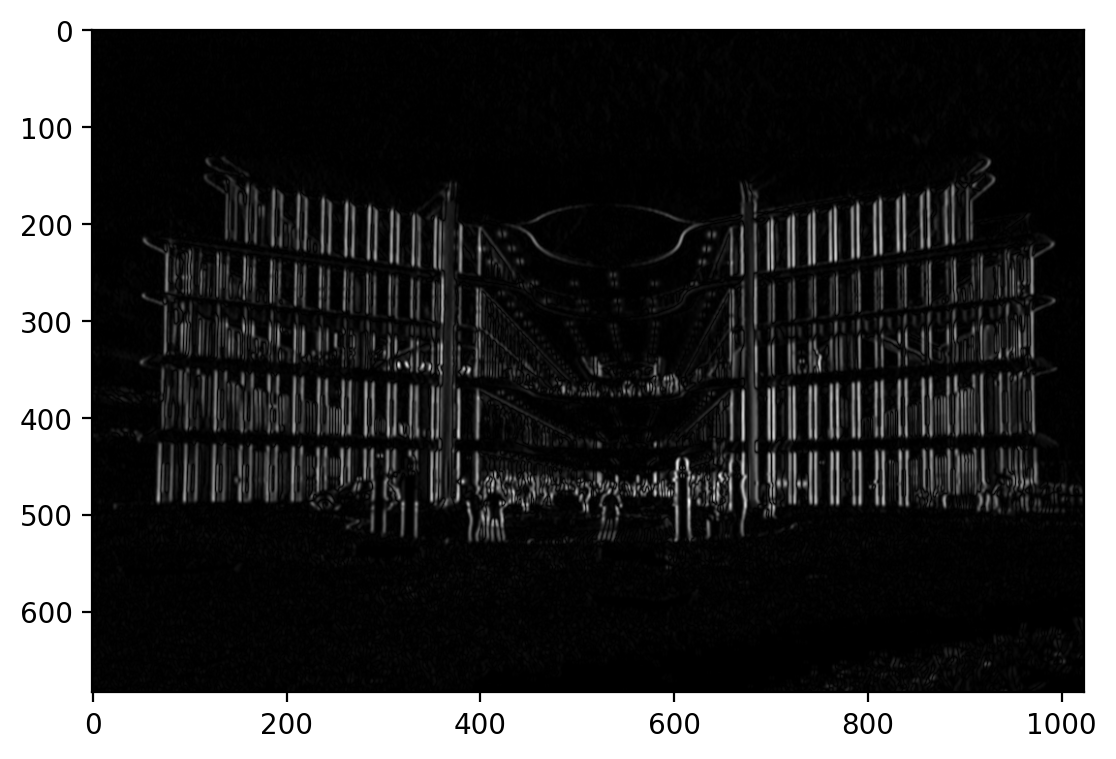

In [5]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
plt.figure(dpi=200)
#Se debe reescalar el resultado de Sobel a una imagen en entero que varía de 0 a 255.
convert_back = cv2.convertScaleAbs(sobelx, alpha=255/sobelx.max())
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(convert_back, cv2.COLOR_BGR2RGB))
plt.show()

En la anterior imagen se muestra el resultado de la detección de bordes de Sobel en la dirección x. Nótese cómo se identifican los bordes verticales de forma predominante, en los cuales el gradiente es más grande en la dirección $x$ (horizontal). En particular se pueden detallar las columnas del edificio así como los bordes verticales de la estructura de la fachada.

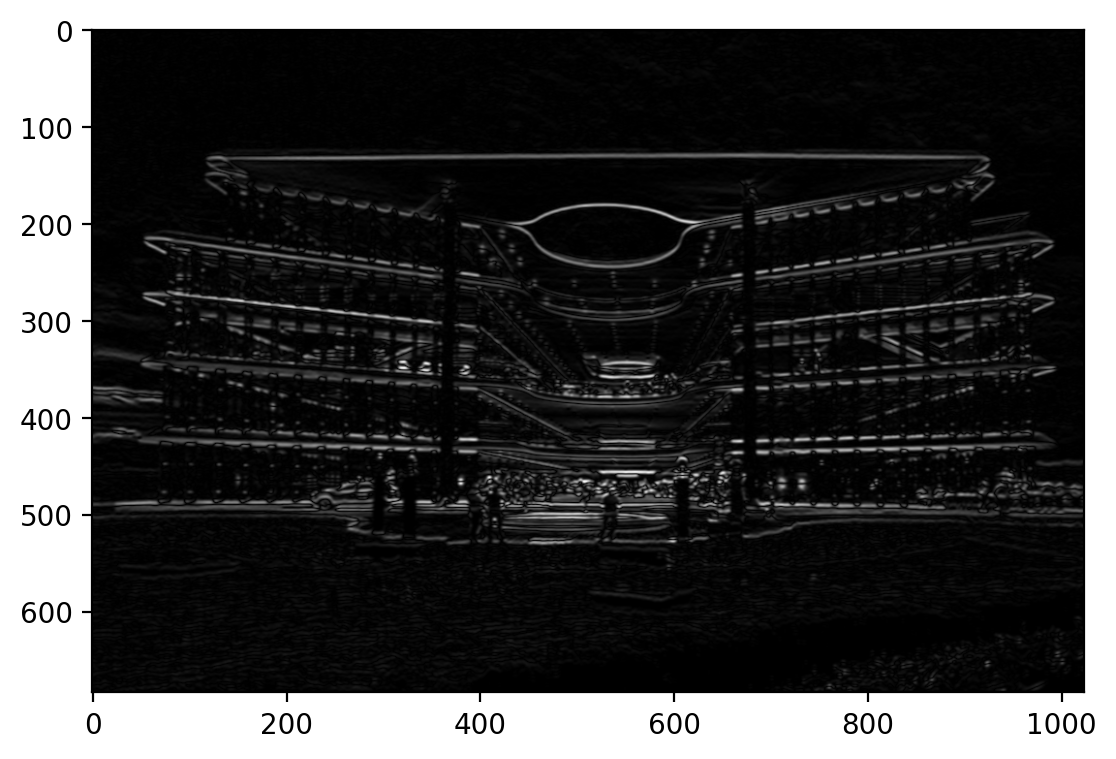

In [6]:
# Display Sobel Edge Detection Images
plt.figure(dpi=200)
#Se debe reescalar el resultado de Sobel a una imagen en entero que varía de 0 a 255.
convert_back = cv2.convertScaleAbs(sobely, alpha=255/sobely.max())
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(convert_back, cv2.COLOR_BGR2RGB))
plt.show()

Cuando se detectan los bordes de Sobel en la dirección $y$, los bordes horizontales son predominantes, por lo que empiezan a resaltar otras características como los pisos y el techo del edificio.

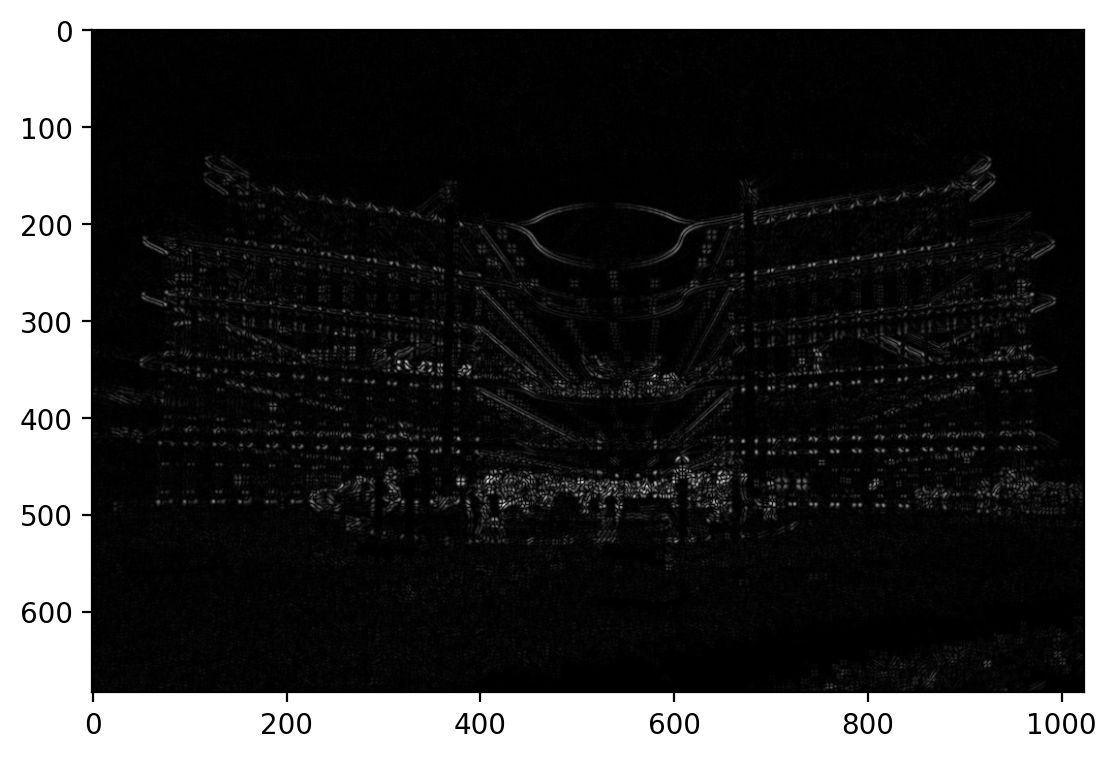

In [7]:
# Display Sobel Edge Detection Images
plt.figure(dpi=200)
#Se debe reescalar el resultado de Sobel a una imagen en entero que varía de 0 a 255.
convert_back = cv2.convertScaleAbs(sobelxy, alpha=255/sobelxy.max())
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(convert_back, cv2.COLOR_BGR2RGB))
plt.show()

Finalmente, al aplicar la detección en ambas direcciones (Sobel-xy) logramos identificar los bordes de los pisos y el techo del edificio con mayor claridad al representar su estructura original con mayor fidelidad. Es importante notar que los bordes puramente verticales y horizontales son menos relevantes en esta imagen; esto se evidencia en los en el borde superior del techo, las columnas y los bordes verticales de la fachada.

### 3. Detección de bordes - Canny

Este es uno de los métodos más robustos y flexibles para detección de bordes ya que aprovecha el cálculo de gradiente de Sobel y le agrega dos procesos adicionales para mejorar la identificación de bordes.

La primera técnica utilizada es la remoción de pixeles no-máximos (_non-maximum suppresion_), el cual revisa si un pixel es un máximo local siguiendo la dirección del gradiente, como ilustra la siguiente imagen:

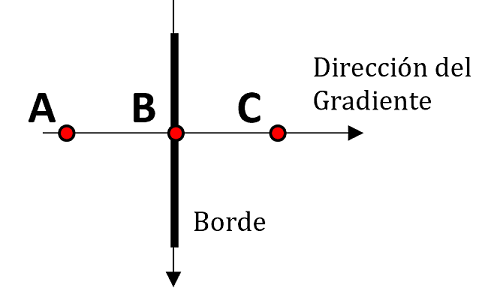

En este caso, el punto B está sobre un borde vertical y, por lo tanto, la dirección del gradiente es normal a este. Los puntos A y C están en la dirección del gradiente y se comparan con el punto B para verificar si forman un máximo local. Si es así, el punto B es considerado para la siguiente fase del método Canny, de lo contrario, se suprime (se establece su valor en 0). Gracias a este proceso se obtienen bordes delgados.

El procesamiento final consiste en una limitación de histéresis (_hysteresis thresholding_) el cual decide cuáles bordes son genuinos y cuáles no lo son. Con esto en mente, se requieren dos valores límites, uno mínimo y uno máximo, a partir de los cuales se pueden tomar las siguientes decisiones:
*   Cualquier borde cuya intensidad de gradiente sea mayor al límite máximo se considera un borde "fuerte" o "genuino" y se conservarán en la imagen final.
*   Si un borde tiene una intensidad menor al límite mínimo, se suprimen esos pixeles y se excluyen de la imagen final.
*   Los pixeles cuyas magnitudes se encuentran entre los dos límites son marcados como bordes débiles y se vuelven candidatos para se incluidos en la imagen final. Para que pixel débil no sea suprimido, debe ser asociado con un borde "fuerte", como se muestra a continuación:

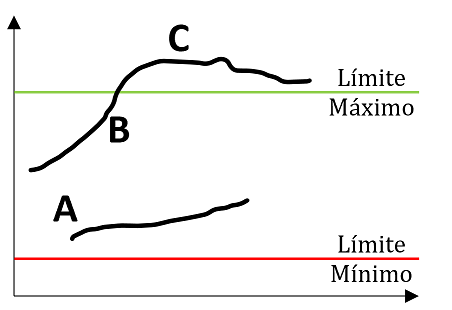

En esta ilustración, el borde A está sobre el límite mínimo pero aún está debajo del máximo, por lo tanto es descartado. Sin embargo, aunque el borde B también está entre ambos límites, está conectado al borde C que es superior al máximo y se considera un borde fuerte, por lo que juntos se consideran un mismo borde y se tienen en cuenta para la imagen de detección final. Debido a esto, es importante seleccionar los valores de los límites apropiadamente para obtener el resultado correcto.

### Actividad individual: Exploración del método de detección de bordes tipo Canny.

Ahora, explore con varios valores de los límites del método Canny y observe el efecto sobre la imagen. Para esto, aproveche la función de OpenCV `Canny()` y revise la [documentación](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) para implementar una función que retorne una imagen con los bordes detectados de la imagen difuminada `img_blur` con unos límites inferior y superior específicos (valores numéricos):

In [8]:
def metodo_Canny(imagen,limite_inferior,limite_superior):
    # your code here
    raise NotImplementedError
    return bordes

A continuación, detecte los bordes de la imagen difuminada `img_blur` usando la función anterior y cambiando los valores de los límites según las siguientes especificaciones:
1.   Detección de bordes aplicando _non-maximum suppresion_ únicamente. _Pista:_ Según la teoría descrita anteriormente, sólo hay un par de valores para los límites con los cuales el paso de _hysteresis thresholding_ no se ejecuta
2.   Detección de bordes de manera que no se identifiquen los bordes del césped en la esquina inferior izquierda de la imagen (o lo que es lo mismo, todos los pixeles de ese cuadrante son iguales a 0, así como su norma):
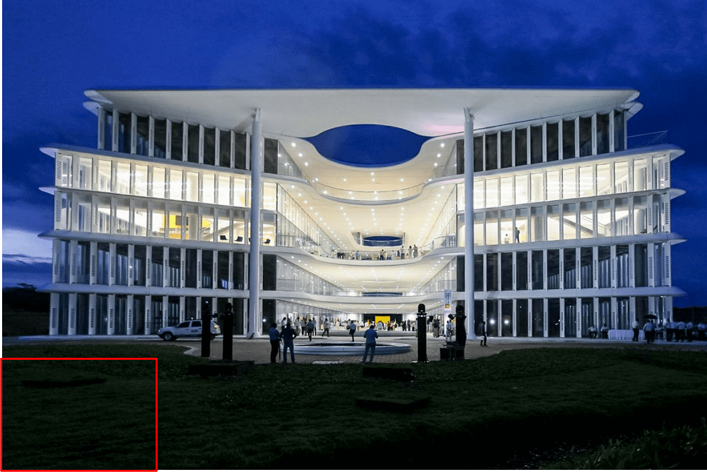

In [ ]:
# Descomente las siguientes líneas con el valor correspondiente de los límites.
#lim_inf1=
#lim_sup1=
#lim_inf2=
#lim_sup2=
# your code here
raise NotImplementedError

In [ ]:
borde_1=metodo_Canny(img_blur,lim_inf1,lim_sup1)
plt.figure(dpi=200)
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(borde_1, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
borde_2=metodo_Canny(img_blur,lim_inf2,lim_sup2)
plt.figure(dpi=200)
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
plt.imshow(cv2.cvtColor(borde_2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Tests
assert round(np.linalg.norm(borde_1[523:683,0:223]),1) == round(26671.58600458548,1)
assert round(np.linalg.norm(borde_2[523:683,0:223]),1) == round(0.0,1)

In [ ]:
#Pruebas ocultas para uso del equipo docente